### Solving Linear Regression Problems through Python

In [1]:
import numpy as np
from scipy.stats import pearsonr, linregress
import matplotlib.pyplot as plt 

#### Linear Regression 

For the equation y = b_0 + b_1*x, we know that:<br>
 - b_1 = cov(x,y)/var(x) = corr(x,y)* std(y)/std(x)
 - b_0 = mean(y) - b_1*mean(x) 

#### Creating a function to generate B0 and B1 given a sample of X and Y

In [3]:
def least_squares_fit(X, Y): #where X and Y are array like data sets
    corr, _ = pearsonr(X, Y)
    b_1 = corr*(np.std(Y))/np.std(X)
    b_0 = np.mean(Y) - np.mean(X)*b_1
    
    return (b_0, b_1)

#### Creating functions to generate predicted values of y and the error term

In [23]:
#y prediction function takes xi, b_0 and b_1 as inputs
def predict(xi, b_0, b_1):
    y_hat = b_0 + b_1*xi
    return y_hat

#Error function takes yi, xi, b_0 and b_1 as inputs

def residual(yi, xi, b_0, b_1):
    error = yi - predict(xi, b_0, b_1)
    return error


#### Creating a function to find sum of squared errors

In [6]:
def sum_of_sq_errors(b_0, b_1, X, Y):
    x_mean = np.mean(X)
    y_mean = np.mean(Y)
    SSE = 0 # Initializing to a zero value
    for xi,yi in zip(X, Y): #Assuming the length of both X and Y are the same, zipping them. 
        error = residual(yi, xi, b_0, b_1)
        SSE+= error*error
    return SSE


In [7]:
#Shorter method via zipping X & Y

#A for loop can be run across a list of tuples. 

def sum_of_sq_errors_tuple(b_0, b_1, X, Y) -> float:
    sse  = sum(residual(b_0, b_1, x_i, y_i)**2 for x_i, y_i in zip(X, Y)) # Zipping creates a list of tuples, each tuple representing an X,Y Pair
    return sse

In [8]:
X = np.array(range(20))
X

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [15]:
error = np.random.normal(loc= 0, scale = 10, size = 20) #Using normally distributed error terms
Y = 5*X + error
Y

array([  4.29443326,  -1.39566788,  38.00240439,  21.57359812,
        15.53448684,  23.7314723 ,  26.68642267,  34.07192329,
        36.1822708 ,  48.38335623,  47.42789628,  49.69390312,
        58.08528165,  65.12458044,  72.99225442,  76.52623913,
        75.06041313,  90.25153451, 105.2374488 ,  92.59500716])

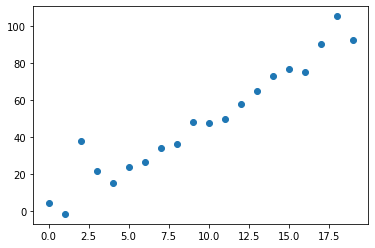

In [16]:
plot = plt.scatter(X,Y)

In [19]:
#Estimating the coefficients

b0,b1 = least_squares_fit(X,Y)

b0 = round(b0,3)
b1 = round(b1,3)

print('The coefficient b0 is ', b0)
print('The coefficient b1 is ', b1)


The coefficient b0 is  2.485
The coefficient b1 is  4.897


In [25]:
#Plotting the prediction line:

def predict(xi, b_0, b_1):
    y_hat = b_0 + b_1*xi
    return y_hat

y_hat_array = []

for xi in X:
    y_hat = predict(xi, b0, b1)
    y_hat_array.append(y_hat)

y_hat_array


[2.485,
 7.382,
 12.279,
 17.176000000000002,
 22.073,
 26.97,
 31.867,
 36.764,
 41.661,
 46.558,
 51.455,
 56.352000000000004,
 61.249,
 66.146,
 71.043,
 75.94,
 80.837,
 85.73400000000001,
 90.631,
 95.528]

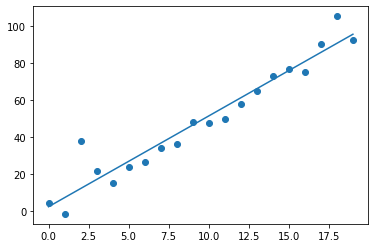

In [27]:
#Checking the overlap through visualization

plt.scatter(X,Y)
plt.plot(X, y_hat_array)

In [28]:
SSE = sum_of_sq_errors(b0 , b1,X,Y)
print("SSE:",SSE)

SSE: 1233.499544834086


In [39]:
# Check with a standard library
regr_results = linregress(X, Y)
print("b_0_via_lib:", round(regr_results.intercept,3), " b_1_via_lib:", round(regr_results.slope,3))
print('\n')
print("b_0_via_solve:", b0, " b_1_via_solve:", b1)

b_0_via_lib: 2.485  b_1_via_lib: 4.897


b_0_via_solve: 2.485  b_1_via_solve: 4.897


#### Thus we can see that the results for the co-efficients match.